In [1]:
import os 
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np 

In [12]:
#load in file
movie_data = os.path.join("netflix_titles_CLEANSEDcsv.csv")

#read file
movie_df = pd.read_csv(movie_data)
movie_df = movie_df.rename(columns={"title": "Title"})
movie_df.head()

,show_id,type,Title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [13]:
movie_df.count()
movie_df.dropna(how='any')

,show_id,type,Title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


In [14]:
genre_df = movie_df.loc[:, "listed_in"]
updated_genre_df = genre_df.str.split(',', expand = True)
updated_genre_df
#updated_genre_df.columns
primary_genre = updated_genre_df[0].value_counts()
primary_genre_df = primary_genre.to_frame()
primary_genre_df
primary_genre_df.columns

Int64Index([0], dtype='int64')

In [15]:
primary_genre_df.columns = ["Total"]
primary_genre_df

,Total
Dramas,1384
Comedies,1074
Documentaries,751
Action & Adventure,721
International TV Shows,690
Children & Family Movies,502
Crime TV Shows,369
Kids' TV,359
Stand-Up Comedy,321
Horror Movies,244


<function matplotlib.pyplot.show(close=None, block=None)>

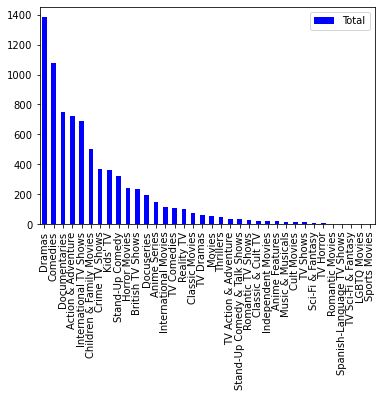

In [16]:
x_axis = primary_genre_df["Total"]
primary_genre_df.plot.bar(color = 'b', align = 'center')
plt.savefig('genre bar plot.png')
plt.show

In [17]:
#making df to see how many movies/shows made per year
year_df = movie_df.loc[:, ["Title", "release_year"]]
year_totals = year_df.value_counts()
year_group = year_totals.groupby('release_year')
year_count = year_group.count()
year_count_df = year_count.to_frame()
year_count_df.columns = ["Count"]
year_count_df

,Count
release_year,
1925,1
1942,2
1943,3
1944,3
1945,3
...,...
2017,1012
2018,1121
2019,996


<function matplotlib.pyplot.show(close=None, block=None)>

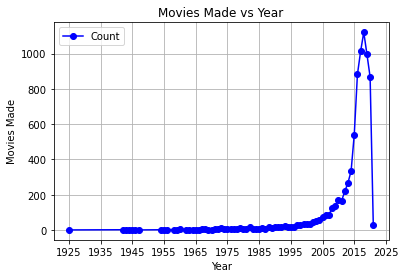

In [18]:
#making line graph of the year data 
x_axis = np.arange(len(year_count_df))
year_count_df.plot.line(color='b', marker = 'o' )
plt.title('Movies Made vs Year')
plt.xlabel('Year')
plt.ylabel('Movies Made')
plt.grid(True)
plt.xticks(range(1925,2030, 10))
plt.savefig('movies each year line.png')
plt.show